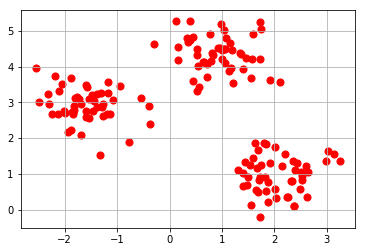

In [31]:
from sklearn.datasets import make_blobs 
import numpy as np
x,y = make_blobs(n_samples = 150, 
                n_features = 2, 
                centers = 3, 
                cluster_std = 0.5, 
                shuffle = True, 
                random_state = 0)
import matplotlib.pyplot as plt 
plt.scatter(x[:,0],x[:,1],c = "red",marker = "o",s = 50)
plt.grid()
plt.show()

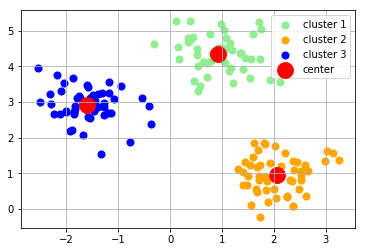

Distortion 72.476


In [44]:
from sklearn.cluster import KMeans 

km = KMeans(n_clusters = 3,
           init = "random",
            n_init= 10,
           max_iter = 300,
            tol = 0.0001,
           random_state = 0)

y_km = km.fit_predict(x)

plt.scatter(x[y_km == 0, 0 ],
           x[y_km == 0, 1 ],
           s = 50,
           c = "lightgreen",
           label = "cluster 1")

plt.scatter(x[y_km == 1, 0 ],
           x[y_km == 1, 1 ],
           s = 50,
           c = "orange",
           label = "cluster 2")

plt.scatter(x[y_km == 2, 0 ],
           x[y_km == 2, 1 ],
           s = 50,
           c = "blue",
           label = "cluster 3")

plt.scatter(km.cluster_centers_[:,0],
           km.cluster_centers_[:,1],
           s = 250,
           c = "red",
           label = "center")

plt.legend(loc="best")
plt.grid()
plt.show()
print("Distortion {0:.3f}".format(km.inertia_))

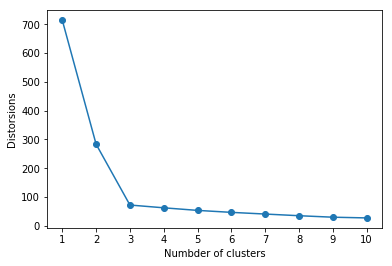

In [33]:
distortions = []
for i in range(1,11):
    km = KMeans(n_clusters = i,
               init = "k-means++",
               n_init= 10,
               max_iter = 300,
               random_state = 0)
    
    km.fit(x)
    distortions.append(km.inertia_)
plt.plot(range(1,11),distortions,marker = "o")
plt.xlabel("Numbder of clusters")
plt.xticks(np.arange(1.0, 11.0, 1.0))
plt.ylabel("Distorsions")
plt.show()

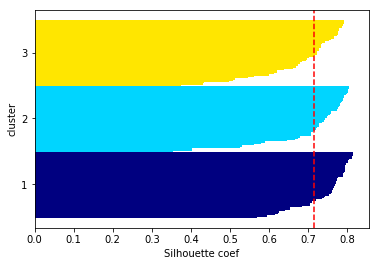

In [42]:
km = KMeans(n_clusters = 3,
           init = "k-means++",
           n_init= 10,
           max_iter = 300,
           random_state = 0)

y_km = km.fit_predict(x)

from matplotlib import cm 
from sklearn.metrics import silhouette_samples 
cluster_labels = np.unique(y_km)

n_clusters = cluster_labels.shape[0]

silhouette_vals = silhouette_samples(x,y_km,metric = "euclidean")

y_ax_lower, y_ax_upper = 0,0
yticks = []
for i,c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[y_km == c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(float(i) / n_clusters)
    plt.barh( range(y_ax_lower,y_ax_upper),
            c_silhouette_vals,
            height = 1.0,
            edgecolor = "none",
            color = color )
    yticks.append( (y_ax_lower + y_ax_upper) / 2 )
    y_ax_lower +=len(c_silhouette_vals)
silhouette_avg = np.mean(silhouette_vals)

plt.axvline(silhouette_avg,
           color = "red",
           linestyle = "--")
plt.yticks(yticks,cluster_labels + 1 )
plt.ylabel("cluster")
plt.xlabel("Silhouette coef")
plt.show()

In [84]:
import pandas as pd
import numpy as np
np.random.seed(12)
variables=['x', 'y', 'z']
labels = ['ID_0','ID_1','ID_2',' ID_3', 'ID_4']
x = np.random.random_sample([5 , 3])*10
df = pd.DataFrame (x, columns=variables , index=labels)
df

,x,y,z
ID_0,1.541628,7.400497,2.633150
ID_1,5.337394,0.145750,9.187470
ID_2,9.007149,0.334214,9.569493
ID_3,1.372093,2.838284,6.060832
ID_4,9.442251,8.527355,0.022592


In [85]:
from scipy.spatial.distance import pdist, squareform

row_dist = pd.DataFrame(squareform(pdist(df,metric = "euclidean")),
                        columns = labels,index = labels)
row_dist


,ID_0,ID_1,ID_2,ID_3,ID_4
ID_0,0.000000,10.488008,12.400774,5.708900,8.396706
ID_1,10.488008,0.000000,3.694396,5.722693,13.080373
ID_2,12.400774,3.694396,0.000000,8.767847,12.588097
ID_3,5.708900,5.722693,8.767847,0.000000,11.573821
ID_4,8.396706,13.080373,12.588097,11.573821,0.000000


In [86]:
from scipy.cluster.hierarchy import linkage 
row_clusters = linkage(pdist(df,metric="euclidean"),method = "complete")

pd.DataFrame(row_clusters,columns = ["label 1","label 2","distance","number of elements "],
    index = ["cluster {0}".format(i+1) for i in range(row_clusters.shape[0])])




,label 1,label 2,distance,number of elements
cluster 1,1.0,2.0,3.694396,2.0
cluster 2,0.0,3.0,5.708900,2.0
cluster 3,4.0,6.0,11.573821,3.0
cluster 4,5.0,7.0,13.080373,5.0


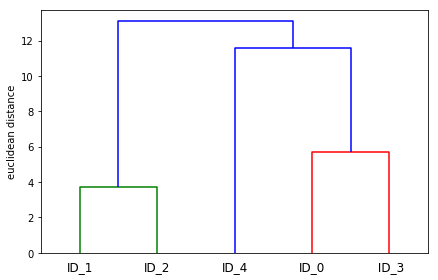

In [87]:
from scipy.cluster .hierarchy import dendrogram

row_dendr = dendrogram(row_clusters, labels= labels)
plt.tight_layout()
plt.ylabel("euclidean distance")
plt.show()

/Users/paul.tgr/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """


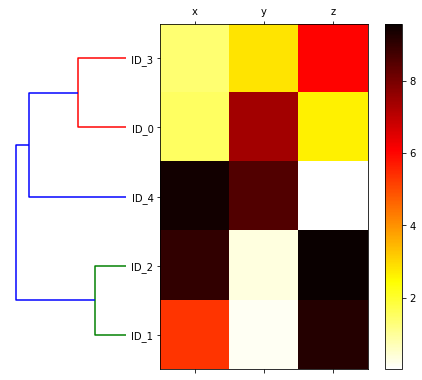

In [88]:
fig = plt.figure(figsize=(8,8),facecolor = "white")
axd = fig.add_axes([0.09,0.1,0.2,0.6])
row_dendr = dendrogram(row_clusters, orientation = "left")

df_rowclust = df.ix[row_dendr["leaves"][::-1]]

axm = fig.add_axes([0.23,0.1,0.6,0.6])
cax = axm.matshow(df_rowclust,interpolation = "nearest", cmap = "hot_r")

axd.set_xticks([])
axd.set_yticks([])

for i in axd.spines.values():
    i.set_visible(False)
fig.colorbar(cax)
axm.set_xticklabels( [""] + list(df_rowclust.columns ))
axm.set_yticklabels( [""] + list(df_rowclust.index ))
plt.show()


In [89]:
from sklearn.cluster import AgglomerativeClustering 

ac = AgglomerativeClustering(n_clusters = 2 , affinity = "euclidean", linkage = "complete")
labels = ac.fit_predict(x)

print(labels)

[0 1 1 0 0]


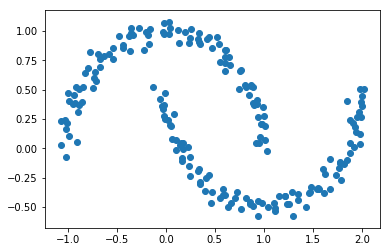

In [91]:
from sklearn.datasets import make_moons 
x,y = make_moons(n_samples = 200, noise = 0.05,random_state = 0 )

plt.scatter (x[:,0],x[:,1])
plt.show()

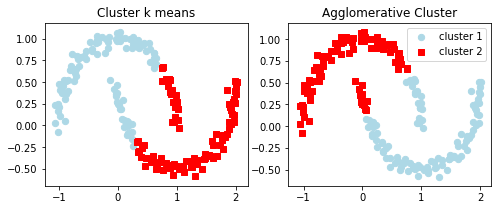

In [95]:
f, (ax1,ax2) = plt.subplots(1,2,figsize = (8,3))

km = KMeans(n_clusters = 2, random_state = 0)

y_km = km.fit_predict(x)
ax1.scatter(x[y_km==0,0],x[y_km==0,1],
            c = "lightblue",
            marker = "o",
            s = 40,
            label = "cluster 1")

ax1.scatter(x[y_km==1,0],x[y_km==1,1],
            c = "red",
            marker = "s",
            s = 40,
            label = "cluster 2")
ax1.set_title("Cluster k means")



ac = AgglomerativeClustering(n_clusters = 2 , affinity = "euclidean", linkage = "complete")
y_ac = ac.fit_predict(x)



ax2.scatter(x[y_ac==0,0],x[y_ac==0,1],
            c = "lightblue",
            marker = "o",
            s = 40,
            label = "cluster 1")

ax2.scatter(x[y_ac==1,0],x[y_ac==1,1],
            c = "red",
            marker = "s",
            s = 40,
            label = "cluster 2")
ax2.set_title("Agglomerative Cluster")
plt.legend()
plt.show()


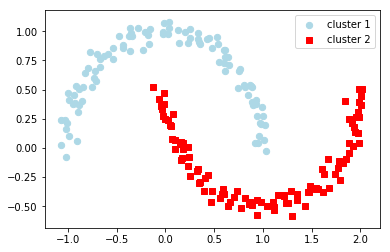

In [97]:
from sklearn.cluster import DBSCAN 
db = DBSCAN(eps = 0.2,
           min_samples = 5,
           metric = "euclidean")


y_db = db.fit_predict(x)



plt.scatter(x[y_db==0,0],x[y_db==0,1],
            c = "lightblue",
            marker = "o",
            s = 40,
            label = "cluster 1")

plt.scatter(x[y_db==1,0],x[y_db==1,1],
            c = "red",
            marker = "s",
            s = 40,
            label = "cluster 2")
plt.legend() 
plt.show()